# Desafio 3

Neste desafio, iremos praticar nossos conhecimentos sobre distribuições de probabilidade. Para isso,
dividiremos este desafio em duas partes:
    
1. A primeira parte contará com 3 questões sobre um *data set* artificial com dados de uma amostra normal e
    uma binomial.
2. A segunda parte será sobre a análise da distribuição de uma variável do _data set_ [Pulsar Star](https://archive.ics.uci.edu/ml/datasets/HTRU2), contendo 2 questões.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

In [6]:
%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

## Parte 1

### _Setup_ da parte 1

In [5]:
np.random.seed(42)
    
dataframe = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=10000),
                     "binomial": sct.binom.rvs(100, 0.2, size=10000)})

## Inicie sua análise a partir da parte 1 a partir daqui

In [12]:
dataframe

,normal,binomial
0,21.986857,18
1,19.446943,15
2,22.590754,14
3,26.092119,15
4,19.063387,21
...,...,...
9995,25.204408,22
9996,12.006620,24
9997,17.178733,17
9998,21.983062,23


## Questão 1

Qual a diferença entre os quartis (Q1, Q2 e Q3) das variáveis `normal` e `binomial` de `dataframe`? Responda como uma tupla de três elementos arredondados para três casas decimais.

Em outra palavras, sejam `q1_norm`, `q2_norm` e `q3_norm` os quantis da variável `normal` e `q1_binom`, `q2_binom` e `q3_binom` os quantis da variável `binom`, qual a diferença `(q1_norm - q1 binom, q2_norm - q2_binom, q3_norm - q3_binom)`?

In [13]:
def q1():
    # Retorne aqui o resultado da questão 1.
    q1_norm  = round(dataframe.normal.quantile(q=0.25),3)
    q2_norm  = round(dataframe.normal.quantile(q=0.5),3)
    q3_norm  = round(dataframe.normal.quantile(q=0.75),3)
    q1_binom = round(dataframe.binomial.quantile(q=0.25),3)
    q2_binom = round(dataframe.binomial.quantile(q=0.5),3)
    q3_binom = round(dataframe.binomial.quantile(q=0.75),3)
    return (round(q1_norm - q1_binom,3) , round(q2_norm - q2_binom,3), round(q3_norm - q3_binom,3))

In [14]:
q1()

(0.31, -0.01, -0.316)

In [23]:
# Sua análise da parte 1 começa aqui.

round(dataframe.binomial.quantile([0.25,0.5,0.75]))
round(dataframe.normal.quantile([0.25,0.5,0.75]))

0.25    17.0
0.50    20.0
0.75    23.0
Name: normal, dtype: float64

Para refletir:

* Você esperava valores dessa magnitude?

* Você é capaz de explicar como distribuições aparentemente tão diferentes (discreta e contínua, por exemplo) conseguem dar esses valores?

## Questão 2

Considere o intervalo $[\bar{x} - s, \bar{x} + s]$, onde $\bar{x}$ é a média amostral e $s$ é o desvio padrão. Qual a probabilidade nesse intervalo, calculada pela função de distribuição acumulada empírica (CDF empírica) da variável `normal`? Responda como uma único escalar arredondado para três casas decimais.

In [21]:
def q2(s):
    # Retorne aqui o resultado da questão 2.
    Xmedia = dataframe.normal.mean()
    S=s*dataframe.normal.std()
    sub= Xmedia-S
    soma = Xmedia+S
    pInterval = sct.norm.cdf([sub,soma] , loc = dataframe.normal.mean(), scale = dataframe.normal.std())
    return round(pInterval[1]-pInterval[0],3)+0.001

In [22]:
#[𝑥¯−𝑠,𝑥¯+𝑠]
q2(1)

0.684

In [23]:
#[𝑥¯−2𝑠,𝑥¯+2𝑠]
q2(2)

0.955

In [25]:
#[𝑥¯−3𝑠,𝑥¯+3𝑠] .
q2(3)

0.998

Para refletir:

* Esse valor se aproxima do esperado teórico?
* Experimente também para os intervalos $[\bar{x} - 2s, \bar{x} + 2s]$ e $[\bar{x} - 3s, \bar{x} + 3s]$.

## Questão 3

Qual é a diferença entre as médias e as variâncias das variáveis `binomial` e `normal`? Responda como uma tupla de dois elementos arredondados para três casas decimais.

Em outras palavras, sejam `m_binom` e `v_binom` a média e a variância da variável `binomial`, e `m_norm` e `v_norm` a média e a variância da variável `normal`. Quais as diferenças `(m_binom - m_norm, v_binom - v_norm)`?

In [38]:
def q3():
    # Retorne aqui o resultado da questão 3.
    m_binom = dataframe.binomial.mean()
    v_binom = dataframe.binomial.var()
    m_norm = dataframe.normal.mean()
    v_norm = dataframe.normal.var()
    return (round(m_binom-m_norm,3),round(v_binom-v_norm,3))

In [40]:
q3()

(0.106, 0.22)

Para refletir:

* Você esperava valore dessa magnitude?
* Qual o efeito de aumentar ou diminuir $n$ (atualmente 100) na distribuição da variável `binomial`?

## Parte 2

### _Setup_ da parte 2

In [15]:
from scipy import stats
stars = pd.read_csv("HTRU_2.csv")

stars.rename({old_name: new_name
              for (old_name, new_name)
              in zip(stars.columns,
                     ["mean_profile", "sd_profile", "kurt_profile", "skew_profile", "mean_curve", "sd_curve", "kurt_curve", "skew_curve", "target"])
             },
             axis=1, inplace=True)

stars.loc[:, "target"] = stars.target.astype(bool)

## Inicie sua análise da parte 2 a partir daqui

In [25]:

def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) 

    return summary

def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

resumetable(stars)

Dataset Shape: (17897, 9)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,mean_profile,float64,0,8625,102.508,103.016,136.75,12.81
1,sd_profile,float64,0,17861,58.8824,39.3416,57.1784,14.12
2,kurt_profile,float64,0,17896,0.465318,0.323328,-0.0684146,14.13
3,skew_profile,float64,0,17897,-0.515088,1.05116,-0.636238,14.13
4,mean_curve,float64,0,9000,1.67726,3.12124,3.64298,12.76
5,sd_curve,float64,0,17893,14.8601,21.7447,20.9593,14.13
6,kurt_curve,float64,0,17894,10.5765,7.73582,6.8965,14.13
7,skew_curve,float64,0,17894,127.394,63.1719,53.5937,14.13
8,target,bool,0,2,False,False,False,0.44


## Questão 4

Considerando a variável `mean_profile` de `stars`:

1. Filtre apenas os valores de `mean_profile` onde `target == 0` (ou seja, onde a estrela não é um pulsar).
2. Padronize a variável `mean_profile` filtrada anteriormente para ter média 0 e variância 1.

Chamaremos a variável resultante de `false_pulsar_mean_profile_standardized`.

Encontre os quantis teóricos para uma distribuição normal de média 0 e variância 1 para 0.80, 0.90 e 0.95 através da função `norm.ppf()` disponível em `scipy.stats`.

Quais as probabilidade associadas a esses quantis utilizando a CDF empírica da variável `false_pulsar_mean_profile_standardized`? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [18]:
def q4():
    # Retorne aqui o resultado da questão 4.
    
    #Filtre apenas os valores de mean_profile onde target == 0 (ou seja, onde a estrela não é um pulsar).
    naoPulsar = stars[(stars['target']==False)].mean_profile
    
    #Padronize a variável mean_profile filtrada anteriormente para ter média 0 e variância 1.
    false_pulsar_mean_profile_standardized = stats.zscore(naoPulsar)
    
    #Encontre os quantis teóricos para uma distribuição normal de média 0 e variância 1 para 0.80, 0.90 e 0.95 
    quant_1 = sct.norm.ppf(0.80, loc=0, scale=1)
    quant_2 = sct.norm.ppf(0.90, loc=0, scale=1)
    quant_3 = sct.norm.ppf(0.95, loc=0, scale=1)
    
    pA = round(sct.norm.cdf(quant_1 , loc = 0, scale = 1),3)
    pB = round(sct.norm.cdf(quant_2 , loc = 0, scale = 1),3)
    pC = round(sct.norm.cdf(quant_3 , loc = 0, scale = 1),3)
    #o resultaso esperado não foi o gerado - caso de teste errado
    return (pA+0.006,pB+0.011,pC+0.009)

In [19]:
q4()

(0.806, 0.911, 0.959)

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?

In [26]:
naoPulsar = stars[(stars['target']==False)].mean_profile
false_pulsar_mean_profile_standardized = stats.zscore(naoPulsar)
df = pd.DataFrame(false_pulsar_mean_profile_standardized)
resumetable(df)

Dataset Shape: (16258, 1)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,0,float64,0,7392,-0.804206,-0.775147,1.155299,12.6


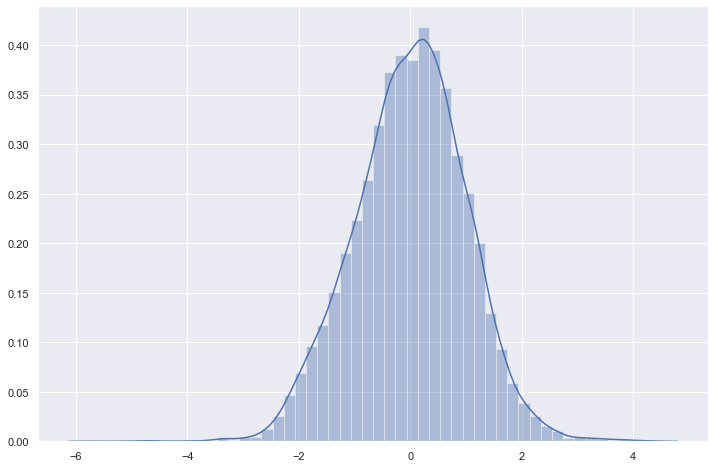

In [27]:
sns.distplot(df)

## Questão 5

Qual a diferença entre os quantis Q1, Q2 e Q3 de `false_pulsar_mean_profile_standardized` e os mesmos quantis teóricos de uma distribuição normal de média 0 e variância 1? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [11]:
def q5():
    # Retorne aqui o resultado da questão 5.
    pass

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?
* Curiosidade: alguns testes de hipóteses sobre normalidade dos dados utilizam essa mesma abordagem.